# Objectif du projet

objectif : 
- L'objectif de ce projet est de créer un modèle prédictif pour prédire la valeur des logements en Californie.

Contexte du projet : 
- Vous êtes développeur AI dans une startup de la Silicon Valley qui fournit des services dans le domaine de l'investissement immobilier. Les chargés de relation client ont mentionné que la demande a augmenté récemment et qu'il devient difficile de faire des estimations personnalisées. De ce fait, l'entreprise vous a confier d'automatiser cette tâche avec un modèle prédictif. 
- Pour cela, vous avez récupéré une base de données qui contient les prix médians des logements pour les districts de Californie issus du recensement de 1990 :
- L'objectif est de créer un modèle avec vos données (train) pour prédire la valeur du prix médian des maisons par district / bloc (medianHouseValue). A la fin du projet, vous devez évaluer ce modèle avec les données (validation) que seul votre client dispose (le prof).

# Import

## Import des librairies

In [229]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import des données

In [230]:
data = pd.read_csv("data/train_data.csv")

In [231]:
data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


# Nettoyage

## Infos basique sur mon dataframe

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


infos : 
- 16512 rows
- 11 columns
- "total_bedrooms" est la seul colonne qui possède des valeurs manquantes
- "ocean_proximity" est la seul colonne de type object

Plus d'information sur les variables :

- longitude : la longitude d'un bloc
- latitude : la latitude d'un bloc
- housingMedianAge: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
- totalRooms: Nombre total de chambres dans un bloc
- totalBedrooms: Nombre total de chambres dans un bloc
- population: Nombre total de personnes résidant dans un bloc
- households: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
- medianIncome: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
- medianHouseValue: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
- oceanProximity: Situation de la maison par rapport à la mer

In [233]:
data.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Modification de colonnes

In [234]:
data.rename(columns = {'Unnamed: 0': "index"},
         inplace = True, errors = 'raise')

## Vérifier les duplicates

In [235]:
data.duplicated().sum()

0

Ce dataset ne possède pas de valeurs dupliquées

## Unique value in the data

I will change the values of "ocean_proximity" to numerical value for better prediction and analysis

In [236]:
data_num = pd.get_dummies(data, columns=['ocean_proximity'], prefix=[""])

In [237]:
data_num

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0


## Observer les valeurs manquantes

In [238]:
data_num.isnull().sum()

index                   0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
_<1H OCEAN              0
_INLAND                 0
_ISLAND                 0
_NEAR BAY               0
_NEAR OCEAN             0
dtype: int64

total_bedrooms est la seul colonne qui possède des NaN, regardons ça de plus près :

In [239]:
NaN = data_num.loc[data_num["total_bedrooms"].isnull()]

In [240]:
NaN

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
33,5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,1,0,0,0,0
171,2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,98100.0,0,0,0,0,1
178,10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,105200.0,0,1,0,0,0
179,19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,127100.0,0,1,0,0,0
259,19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16002,17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,357500.0,0,0,0,0,1
16089,17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,0,0,0,0,1
16214,4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,1,0,0,0,0
16228,9942,-122.23,38.17,45.0,350.0,NaN,225.0,72.0,1.8942,216700.0,0,0,0,1,0


Est-ce que ces bloc d'habitation on la même localisation ?

In [241]:
NaN.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
count,176.000000,176.000000,176.000000,176.000000,176.000000,0.0,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,176.000000
mean,10617.897727,-119.495909,35.514716,28.806818,2626.465909,NaN,1513.028409,520.568182,3.909932,212705.715909,0.522727,0.255682,0.0,0.090909,0.130682
std,6147.724833,1.985183,2.063548,11.731138,1837.840577,NaN,1105.290728,403.025424,1.978400,111750.522705,0.500908,0.437488,0.0,0.288300,0.338014
min,290.000000,-124.130000,32.660000,4.000000,238.000000,NaN,191.000000,67.000000,0.933600,47700.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,4830.750000,-121.857500,34.010000,18.000000,1344.750000,NaN,794.000000,267.500000,2.636225,137500.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,10124.500000,-118.495000,34.200000,29.500000,2251.000000,NaN,1240.000000,438.000000,3.468850,185750.000000,1.000000,0.000000,0.0,0.000000,0.000000
75%,16104.250000,-118.050000,37.450000,37.250000,3551.500000,NaN,1940.500000,627.500000,4.784300,274075.000000,1.000000,1.000000,0.0,0.000000,0.000000
max,20484.000000,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000,1.000000,1.000000,0.0,1.000000,1.000000


Réponse : 
- Non les localisations sont assez bien réparties
- Il n'y a pas d'indicateurs particulié qui expliquerait pourquoi ces NaN ont été oublié

## Imputation sur les NaN 

Je décide de remplacer ces 176 valeurs manquante sur la colonne "total_bedrooms" par la médiane

In [242]:
median = data_num["total_bedrooms"].median()

In [243]:
data_num["total_bedrooms"].fillna(median, inplace = True)

In [244]:
data_num.isnull().sum()

index                 0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
_<1H OCEAN            0
_INLAND               0
_ISLAND               0
_NEAR BAY             0
_NEAR OCEAN           0
dtype: int64

## Datatype of my dataframe

In [245]:
types = data_num.dtypes

In [246]:
types

index                   int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
_<1H OCEAN              uint8
_INLAND                 uint8
_ISLAND                 uint8
_NEAR BAY               uint8
_NEAR OCEAN             uint8
dtype: object

## Matrice des correlations

<AxesSubplot:>

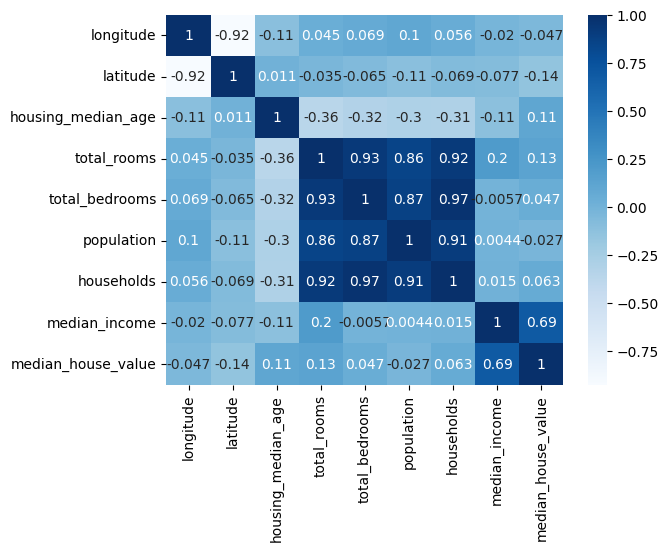

In [247]:
data_corr = data_num.drop(["index", "_<1H OCEAN", "_INLAND", "_ISLAND","_NEAR BAY", "_NEAR OCEAN"], axis = 1)
cor = data_corr.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.Blues)

Observation :
- median_income a une assez forte corrélation avec la target 'median_house_value'
- households a une assez forte corrélation avec median_house_value
- total_bedrooms est moyennement correlée avec median_house_value
- les variables total_rooms, total_bedrooms, population, households sont fortement correlées entre elles 

## détecter les outliers

In [248]:
def plot_multiple_boxplots(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

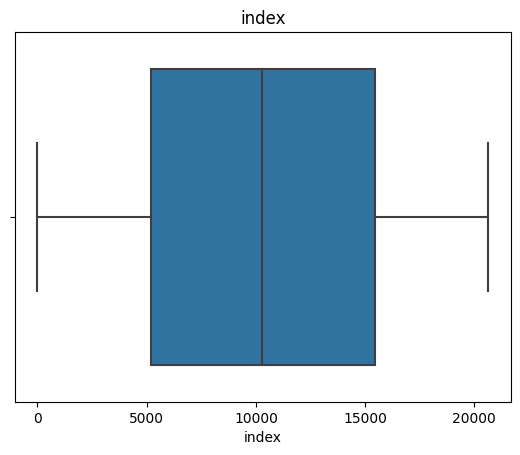

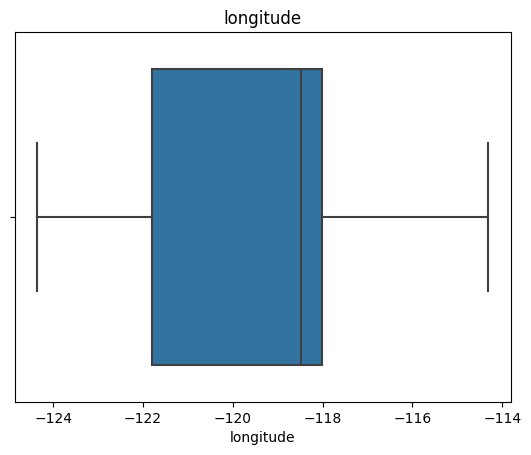

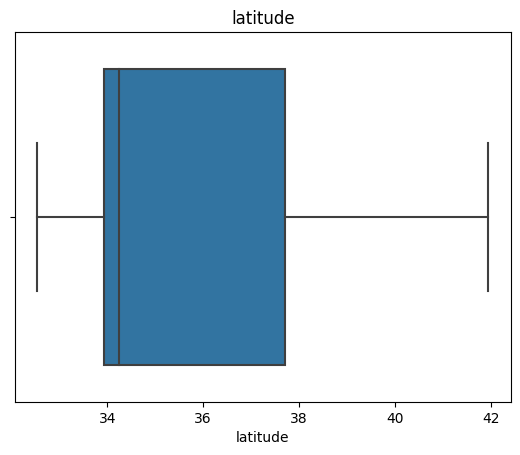

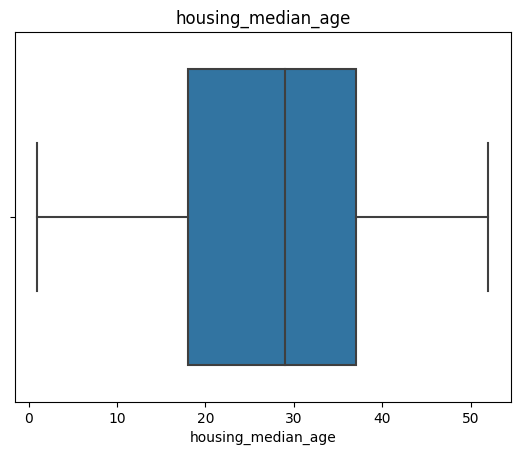

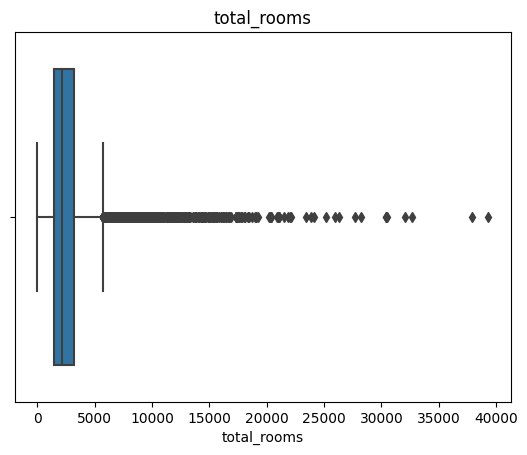

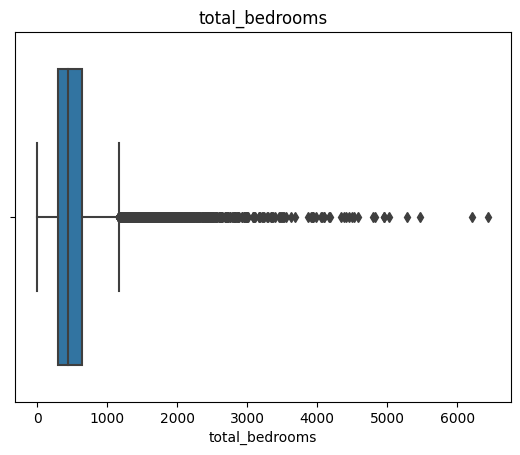

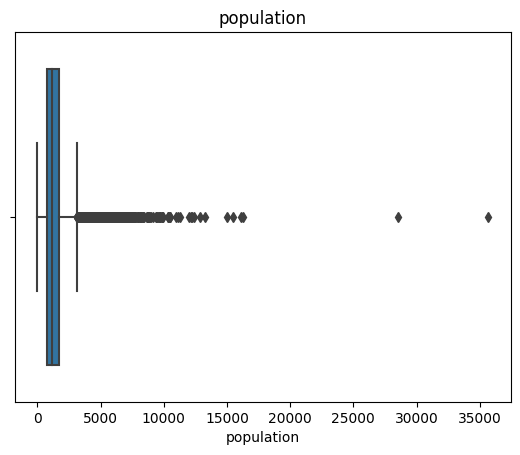

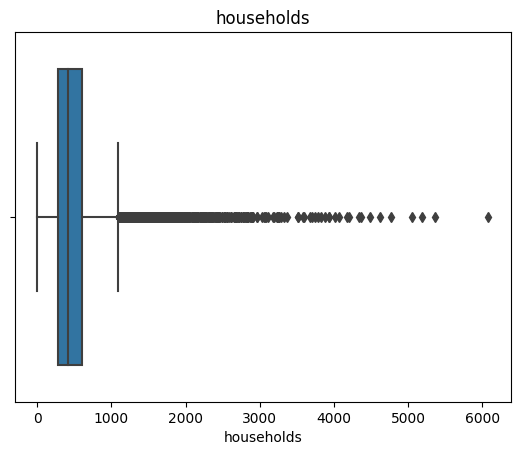

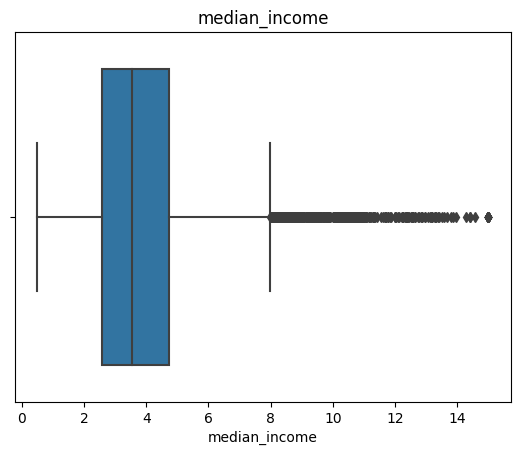

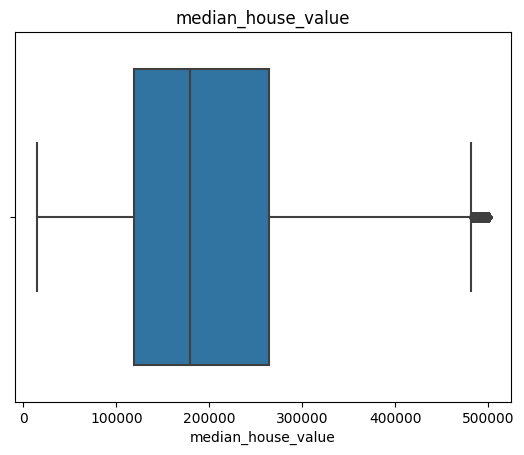

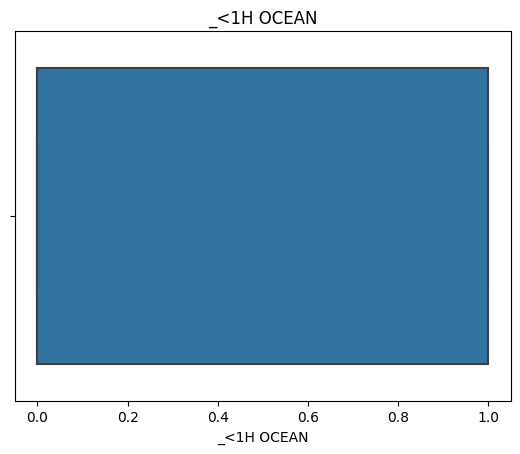

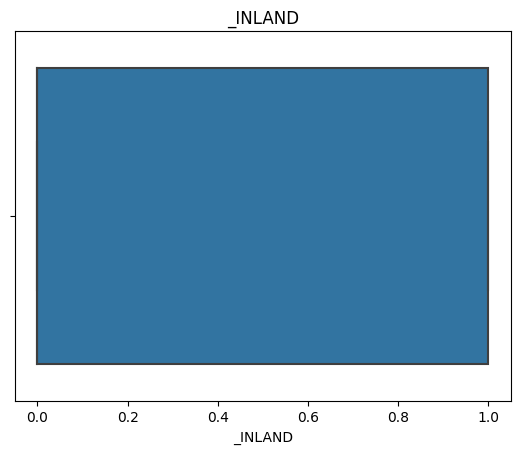

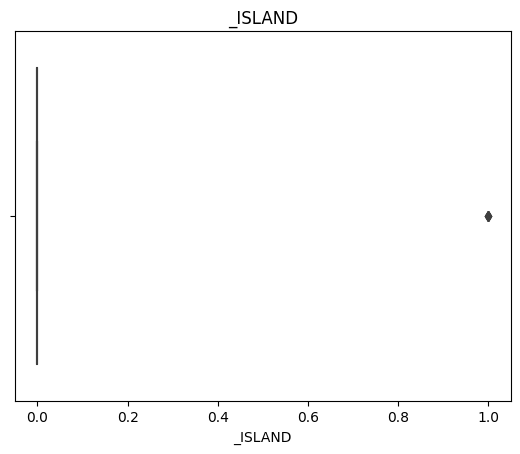

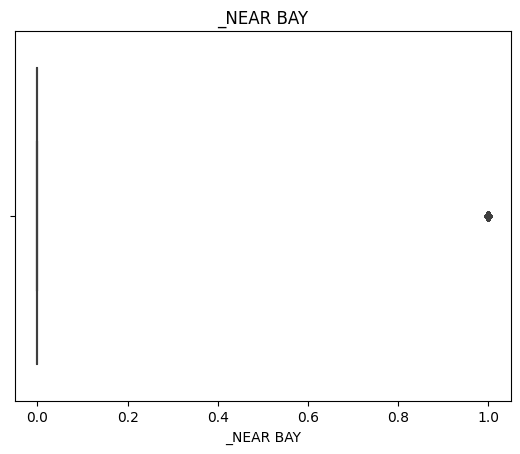

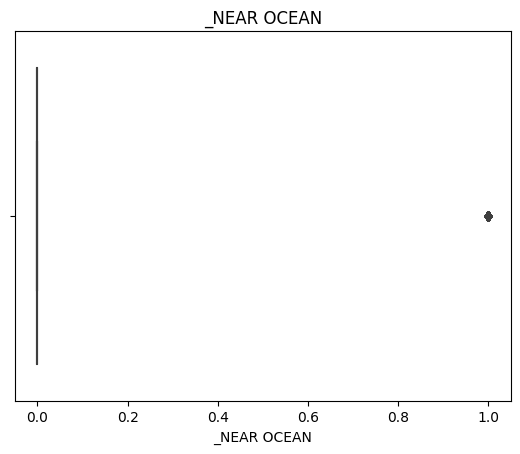

In [249]:
box_with_outliers = plot_multiple_boxplots(data_num)

Observation : 
- Les outliers à traiter sont sur les colonnes : total_rooms, total_bedrooms, population, households, median_income
- ces colonnes (mis à part median_income) sont fortement correlées entre elles.
- Ces outliers peuvent représenter des propriétés importante pour mon modèle, il peut donc être important de les conserver dans les données pour une analyse plus précise.

Conclusion :
- Dans mon cas, ou l'objectif est de créer un modèle prédictif pour prédire la valeur des logements en Californie, je préfère utiliser utiliser IQR, pour identifier les proriétés extrêmes

## détails sur ces outliers (avec IQR)

In [250]:
# Calculer Q1, Q3 et IQR
Q1 = data_num['total_rooms'].quantile(0.25)
Q3 = data_num['total_rooms'].quantile(0.75)
IQR = Q3 - Q1

# Identifier les outliers
outliers_tr = data_num.loc[(data_num['total_rooms'] < Q1 - 1.5 * IQR) | (data_num['total_rooms'] > Q3 + 1.5 * IQR)]

# Afficher les outliers
# outliers_tr

In [251]:


outliers_tr.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.0,1052.000000,1052.000000
mean,10828.077947,-119.253840,35.398916,15.450570,8848.555133,1645.314639,4173.519962,1497.896388,4.767400,237104.057034,0.434411,0.384981,0.0,0.079848,0.100760
std,5579.571183,2.001867,2.027622,8.790317,4028.556883,752.294992,2338.599213,682.254076,1.966648,115027.313503,0.495915,0.486822,0.0,0.271187,0.301154
min,101.000000,-123.220000,32.550000,2.000000,5721.000000,435.000000,416.000000,189.000000,1.381100,22500.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,6265.000000,-121.490000,33.870000,8.000000,6367.250000,1162.750000,2876.750000,1068.000000,3.340500,146225.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,12066.000000,-118.450000,34.225000,15.000000,7410.500000,1457.000000,3563.500000,1335.500000,4.437100,215000.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,14959.750000,-117.607500,37.590000,21.000000,9654.000000,1857.250000,4759.000000,1697.250000,5.664400,298725.000000,1.000000,1.000000,0.0,0.000000,0.000000
max,20629.000000,-116.090000,41.610000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.947000,500001.000000,1.000000,1.000000,0.0,1.000000,1.000000


Observation :
- Pour ces outliers, une maison dans un bloc est en moyenne plus récente (15 ans contre 28)
- "total_rooms", "total_bedrooms", "population", "households" sont beaucoup plus élevé que la moyenne

In [252]:
# Calculer Q1, Q3 et IQR
Q1 = data_num['total_bedrooms'].quantile(0.25)
Q3 = data_num['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Identifier les outliers
outliers_tb = data_num.loc[(data_num['total_bedrooms'] < Q1 - 1.5 * IQR) | (data_num['total_bedrooms'] > Q3 + 1.5 * IQR)]

# Afficher les outliers
# outliers_tb

In [253]:
outliers_tb.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.0,1048.000000,1048.000000
mean,10423.028626,-119.127023,35.263483,17.042939,8372.900763,1736.117366,4198.322519,1555.306298,3.904817,217688.592557,0.451336,0.357824,0.0,0.097328,0.093511
std,5489.202099,1.984603,1.989510,9.728554,4379.372161,689.693112,2370.356071,647.878319,1.638557,106508.428312,0.497864,0.479589,0.0,0.296546,0.291287
min,95.000000,-123.220000,32.550000,2.000000,1714.000000,1165.000000,416.000000,189.000000,0.747300,22500.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5699.500000,-121.392500,33.877500,9.000000,5730.250000,1298.000000,2862.750000,1189.000000,2.752600,139675.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,11540.500000,-118.365000,34.150000,17.000000,7189.000000,1513.000000,3725.000000,1381.000000,3.631500,193000.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,14242.500000,-117.600000,37.542500,23.000000,9629.000000,1866.000000,4797.000000,1707.750000,4.747050,275000.000000,1.000000,1.000000,0.0,0.000000,0.000000
max,20629.000000,-114.310000,41.610000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.294900,500001.000000,1.000000,1.000000,0.0,1.000000,1.000000


Observation :
- Pour ces outliers, une maison dans un bloc est en moyenne plus récente (17 ans contre 28)
- "total_rooms", "total_bedrooms", "population", "households" sont beaucoup plus élevé que la moyenne

In [254]:
# Calculer Q1, Q3 et IQR
Q1 = data_num['population'].quantile(0.25)
Q3 = data_num['population'].quantile(0.75)
IQR = Q3 - Q1

# Identifier les outliers
outliers_p = data_num.loc[(data_num['population'] < Q1 - 1.5 * IQR) | (data_num['population'] > Q3 + 1.5 * IQR)]

# Afficher les outliers
# outliers_p

In [255]:
outliers_p.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.0,951.000000,951.000000
mean,10368.802313,-119.093354,35.166498,17.646688,8195.405889,1624.041009,4733.039958,1524.941115,4.020097,201058.385910,0.500526,0.341746,0.0,0.063091,0.094637
std,5503.555273,1.879265,1.936950,9.990484,4784.368020,805.993024,2198.420531,712.536593,1.757553,94694.722902,0.500263,0.474544,0.0,0.243255,0.292867
min,95.000000,-124.150000,32.550000,2.000000,19.000000,5.000000,3164.000000,6.000000,0.900000,22500.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,6048.000000,-121.300000,33.890000,10.000000,5212.000000,1125.000000,3519.500000,1088.000000,2.731050,137200.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,10664.000000,-118.300000,34.130000,17.000000,7241.000000,1446.000000,4031.000000,1370.000000,3.731300,179000.000000,1.000000,0.000000,0.0,0.000000,0.000000
75%,14664.500000,-117.755000,37.330000,24.000000,9809.500000,1871.500000,5031.000000,1748.000000,5.059100,246850.000000,1.000000,1.000000,0.0,0.000000,0.000000
max,20629.000000,-115.220000,41.810000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.294900,500001.000000,1.000000,1.000000,0.0,1.000000,1.000000


Observation :
- Pour ces outliers, une maison dans un bloc est en moyenne plus récente (17 ans contre 28)
- "total_rooms", "total_bedrooms", "population", "households" sont beaucoup plus élevé que la moyenne

In [256]:
# Calculer Q1, Q3 et IQR
Q1 = data_num['households'].quantile(0.25)
Q3 = data_num['households'].quantile(0.75)
IQR = Q3 - Q1

# Identifier les outliers
outliers_h = data_num.loc[(data_num['households'] < Q1 - 1.5 * IQR) | (data_num['households'] > Q3 + 1.5 * IQR)]

# Afficher les outliers
# outliers_h

In [257]:
outliers_h.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.000000,985.000000
mean,10258.309645,-119.228112,35.298305,17.194924,8547.151269,1739.558376,4395.814213,1616.579695,4.025818,223364.615228,0.481218,0.328934,0.0,0.097462,0.092386
std,5525.663515,1.970134,2.005101,9.628072,4428.982187,720.881845,2334.890231,627.845242,1.703185,108002.839017,0.499901,0.470065,0.0,0.296736,0.289717
min,95.000000,-123.220000,32.550000,2.000000,2124.000000,435.000000,1690.000000,1096.000000,0.900000,22500.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5540.000000,-121.490000,33.890000,10.000000,5831.000000,1304.000000,3083.000000,1226.000000,2.835700,142900.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,10848.000000,-118.380000,34.150000,17.000000,7283.000000,1525.000000,3838.000000,1421.000000,3.724000,197500.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,14209.000000,-117.720000,37.560000,23.000000,9807.000000,1892.000000,4907.000000,1745.000000,4.922200,277700.000000,1.000000,1.000000,0.0,0.000000,0.000000
max,20629.000000,-116.090000,41.610000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.294900,500001.000000,1.000000,1.000000,0.0,1.000000,1.000000


Observation :
- Pour ces outliers, une maison dans un bloc est en moyenne plus récente (17 ans contre 28)
- "total_rooms", "total_bedrooms", "population", "households" sont beaucoup plus élevé que la moyenne

In [258]:
# Calculer Q1, Q3 et IQR
Q1 = data_num['median_income'].quantile(0.25)
Q3 = data_num['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Identifier les outliers
outliers_mi = data_num.loc[(data_num['median_income'] < Q1 - 1.5 * IQR) | (data_num['median_income'] > Q3 + 1.5 * IQR)]

# Afficher les outliers
# outliers_mi

In [259]:
outliers_mi.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.0,555.000000,555.000000
mean,10183.154955,-119.661748,35.317514,28.261261,3394.174775,457.055856,1275.154955,439.068468,10.043438,459622.082883,0.598198,0.072072,0.0,0.158559,0.171171
std,5735.790639,1.963343,1.830613,13.932737,2903.614818,395.573393,1169.532822,376.494086,1.981501,70393.062565,0.490705,0.258841,0.0,0.365593,0.376998
min,0.000000,-122.640000,32.630000,2.000000,19.000000,3.000000,13.000000,5.000000,7.994300,112500.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5268.000000,-122.030000,33.880000,18.000000,1761.500000,243.000000,654.000000,233.000000,8.450850,431800.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,10312.000000,-118.490000,34.150000,27.000000,2649.000000,356.000000,970.000000,343.000000,9.527100,500001.000000,1.000000,0.000000,0.0,0.000000,0.000000
75%,16017.500000,-118.085000,37.400000,37.000000,4169.000000,559.000000,1545.000000,549.000000,10.803950,500001.000000,1.000000,0.000000,0.0,0.000000,0.000000
max,20503.000000,-116.260000,39.000000,52.000000,30405.000000,4093.000000,12873.000000,3931.000000,15.000100,500001.000000,1.000000,1.000000,0.0,1.000000,1.000000


Observation : 
- je remarque que les blocs d'habitations qui ont des outliers dans "median_income" ont un en moyenne median_income bien plus élevé (10 contre 3) et possèdent aussi en moyenne une median_house_value bien plus élévé (environ 460 000 contre 200 000)
- Donc le prix des maisons pour les ménages d'un bloc augmente lorsque le revenu de ces même ménages augmente
- On voit aussi clairement que plus un bloc est cher, plus ils ont tendance à se rapprocher de l'océan et des bay, et que ceux qui achêtent ces bloc cher ont généralement de meilleurs revenus.

## Traitement des outliers sans diminuer les performances de mon modèle

boucle qui créer une variable binaire en fonction de l'IQR qui passe sur chacune de mes colonnes

In [268]:
data_num['outlier'] = 0
for col in data_num.columns:
    Q1 = data_num[col].quantile(0.25)
    Q3 = data_num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_num.loc[(data_num[col] < lower_bound) | (data_num[col] > upper_bound), 'outlier'] = 1

In [269]:
data_num

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,outlier
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0,0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0,0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0,0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0,0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0,0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0,1
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0,0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0,0


In [270]:
data_num.outlier.value_counts()

0    10765
1     5747
Name: outlier, dtype: int64

# Export de mon dataframe

In [271]:
df_export = data_num.to_csv(r'data/data_num.csv', index=False)